# FX_Vol_Surface_Construction_SABR

In [1]:
# import generic packages required 
import os
import pandas as pd
import numpy as np
 
# import classes for construction of the volatility surface with SABR
from FX_smile.FX_build_smile import build_smile as bsm 
from FX_smile.FX_vol_surf_strike_tenor_interpolation import smile_K_interp as ski 
from FX_smile.FX_vol_surf_strike_tenor_interpolation import smile_T_interp as sti 

## 01: Build FX Smile 

In [2]:
# select the datasets for the specific currency under analysis (here EURUSD)
ATM_EU = np.load('Sample_Data/implied_vol_ATM_EU.npy')
MS_EU = np.load('Sample_Data/implied_vol_MS_EU.npy')
RR_EU = np.load('Sample_Data/implied_vol_RR_EU.npy')
delta_EU = np.load('Sample_Data/deltas_EU.npy')
tenor_EU = np.load('Sample_Data/tenors_EU.npy')
expiry_EU = np.load('Sample_Data/maturities_EU.npy')
S_EU = np.load('Sample_Data/underlying_S_rate_EU.npy')
rd_EU = np.load('Sample_Data/domestic_risk_free_EU.npy')
rf_EU = np.load('Sample_Data/foreign_risk_free_EU.npy')
F_EU = np.load('Sample_Data/Forward_EU.npy')
delta_convention_EU = np.load('Sample_Data/delta_convention_EU.npy')
beta_arr_EU = np.load('Sample_Data/SABR_beta_EU.npy')

In [3]:
# construct the smile usign the class build_smile (bsm)
smile = bsm.construct_fx_smile(delta_EU,expiry_EU,ATM_EU,MS_EU,RR_EU,S_EU,rd_EU,rf_EU,delta_convention_EU,beta_arr_EU,tenor_EU)

In [4]:
smile.head()

Tenor_str  Tenor_float  Delta     Alpha  Beta      Vega       Rho     K_ATM  \
0        1W     0.019444   0.35  0.121350   1.0  3.696509 -0.350924  1.319675   
1        1M     0.083333   0.35  0.119396   1.0  2.039990 -0.375385  1.320231   
2        2M     0.166667   0.35  0.122021   1.0  1.491976 -0.372916  1.321013   
3        3M     0.250000   0.35  0.123726   1.0  1.270346 -0.360783  1.321787   
4        6M     0.500000   0.35  0.126367   1.0  0.932497 -0.353035  1.323912   

     K_Call     K_Put   Vol_ATM  Vol_Call   Vol_Put  mrk_rr_vol  SABR_rr_vol  \
0  1.328189  1.310609  0.123350  0.119839  0.128539   -0.008700    -0.008700   
1  1.337548  1.301660  0.121650  0.117521  0.127946   -0.010425    -0.010425   
2  1.346082  1.294270  0.124300  0.120057  0.130907   -0.010850    -0.010850   
3  1.353038  1.288634  0.126175  0.121970  0.132995   -0.011025    -0.011025   
4  1.369261  1.276421  0.128750  0.124582  0.135782   -0.011200    -0.011200   

   rr_cond_error   ss_call    ss_put  ss_cond_error  
0  -5.645692e-11 -0.000839 -0.000839  -5.645691e-11  
1  -7.397038e-11 -0.001083 -0.001083  -7.397037e-11  
2  -4.420827e-12 -0.001182 -0.001182  -4.420839e-12  
3  -2.179298e-13 -0.001307 -0.001307  -2.179368e-13  
4  -9.881124e-13 -0.001432 -0.001432  -9.880985e-13

## 02: Strike Interpolation - SABR

In [5]:
# define tenor in string format 
tenor_str = ['1W', '1M', '2M', '3M', '6M', '9M', '1Y', '3Y']
# define deltas for all the options 
delta_target = [-0.05, -0.1, -0.15, -0.25, -0.35, 0.5, 0.35, 0.25, 0.15, 0.1, 0.05]
# define type of option: w = 1 for call and w = -1 for put 
w = [-1,-1,-1,-1,-1,1,1,1,1,1,1]

# interpolate among smile strikes for each maturity
SABR_K_interp, mrk_smiles, mrk_dfs = ski.smile_K_interp_SABR(smile,tenor_str,expiry_EU,S_EU,rd_EU,rf_EU,delta_EU,delta_target,w,plot=False)

Optimal par for tenor 1W: alpha = 0.12210530487358848  -  gamma = 3.0798333974658982  -  rho = -0.4001626042926206
Optimal par for tenor 1M: alpha = 0.12069036937751494  -  gamma = 1.5836076508959924  -  rho = -0.46722144690078904
Optimal par for tenor 2M: alpha = 0.12318038807740406  -  gamma = 1.2210506879438578  -  rho = -0.44064557262918924
Optimal par for tenor 3M: alpha = 0.12479979652282265  -  gamma = 1.0781627478214735  -  rho = -0.4122466639640797
Optimal par for tenor 6M: alpha = 0.1273299651282201  -  gamma = 0.8201303624396851  -  rho = -0.39322404216202356
Optimal par for tenor 9M: alpha = 0.12812371577130546  -  gamma = 0.7108700398618703  -  rho = -0.37631435011452374
Optimal par for tenor 1Y: alpha = 0.12859301880890725  -  gamma = 0.64098031281419  -  rho = -0.36696416028219825
Optimal par for tenor 3Y: alpha = 0.12473945766877356  -  gamma = 0.34970333028472733  -  rho = -0.3662224203304144


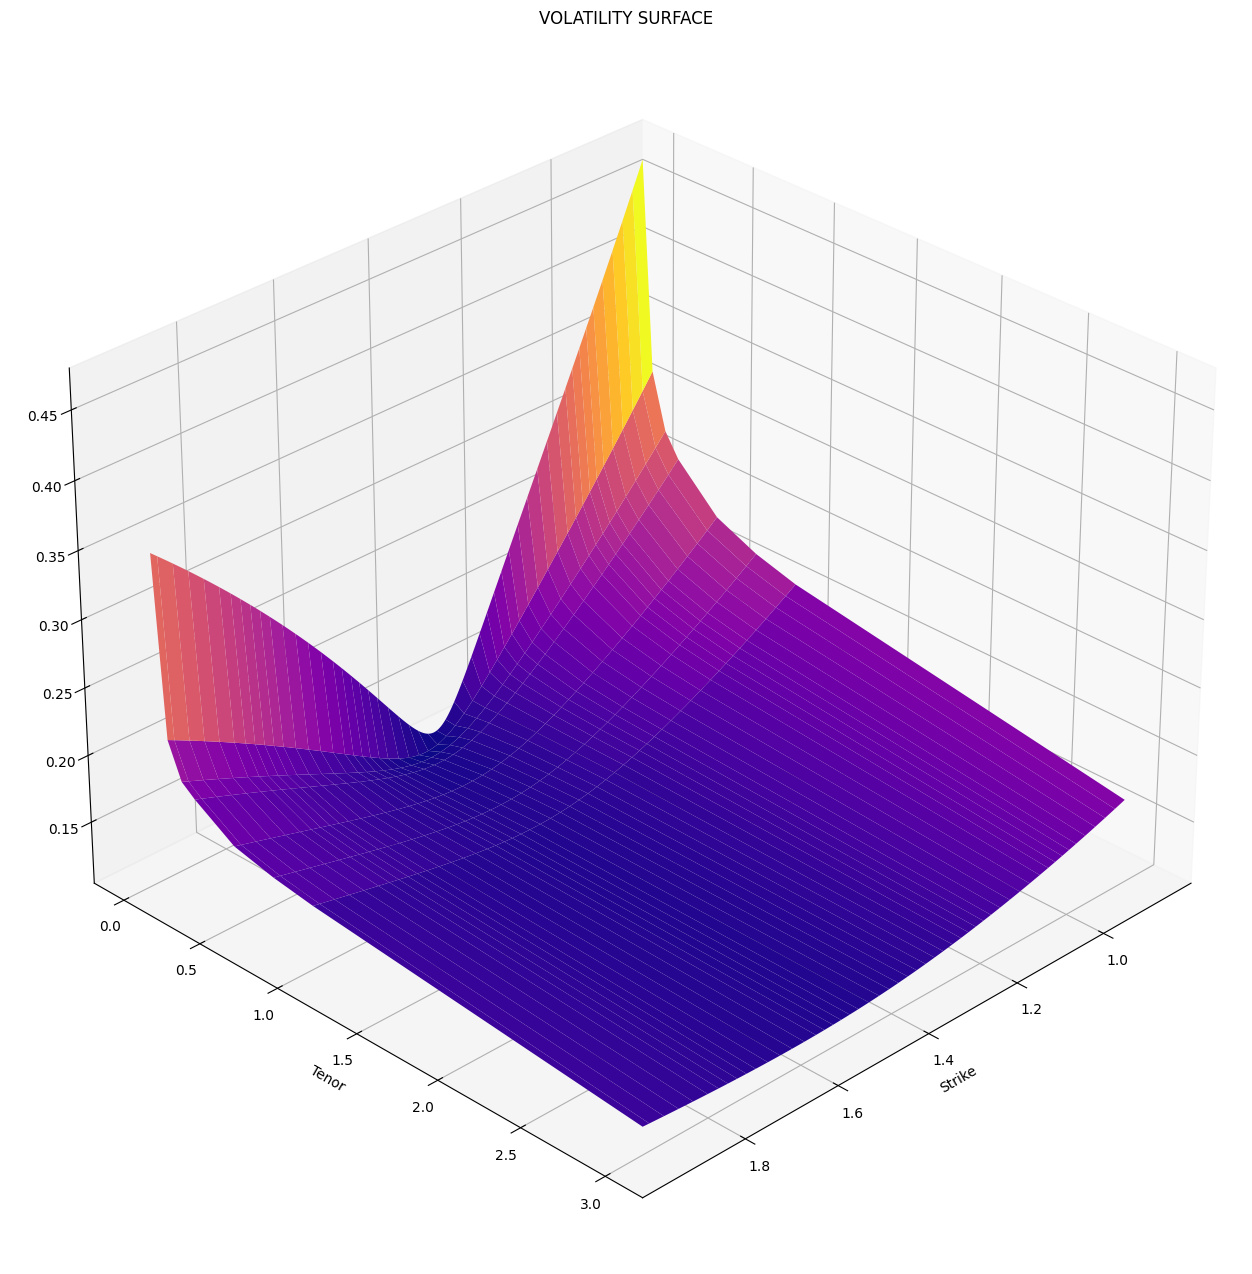

In [6]:
# plot static 3D surface 
ski.plot_surf_K_interp(SABR_K_interp)

In [7]:
# SABR_K_interp.head()
mrk_smiles.head()
# mrk_dfs

Tenor         K        IV  w  delta_target       S       rd        rf  \
0  0.019444  1.275292  0.149455 -1         -0.05  1.3195  0.00218  0.002965   
1  0.019444  1.285965  0.145119 -1         -0.10  1.3195  0.00218  0.002965   
2  0.019444  1.293123  0.140949 -1         -0.15  1.3195  0.00218  0.002965   
3  0.019444  1.303185  0.133973 -1         -0.25  1.3195  0.00218  0.002965   
4  0.019444  1.310609  0.128539 -1         -0.35  1.3195  0.00218  0.002965   

       Fwd  beta     gamma     alpha       rho  
0  1.31948     1  3.079833  0.122105 -0.400163  
1  1.31948     1  3.079833  0.122105 -0.400163  
2  1.31948     1  3.079833  0.122105 -0.400163  
3  1.31948     1  3.079833  0.122105 -0.400163  
4  1.31948     1  3.079833  0.122105 -0.400163

## 03: Tenor interpolation - Flat Forward

In [8]:
# define initial tenors available 
initial_tenors = np.array([7, 30, 60, 90, 180, 270, 360, 1080])/360
initil_tenor_str = ['1W', '1M', '2M', '3M', '6M', '9M', '1Y', '3Y']
# define interpolated tenors (weekly) + check if any element in interp_tenors is already contained in T_i
array = np.array([14 + i * 7 for i in range(int(1080/7)-1)])/360
interp_tenors = array[~np.isin(array, initial_tenors)]

# perform flat forward interpolation to retrive fully populated matrix of implied volatilities
k_hat_dfs, interp_df_list, interp_iv, interp_iv_par = sti.IV_Surf_Smoothing(mrk_dfs,initial_tenors,interp_tenors,initil_tenor_str, plot=False)

Interpolation in range [ 0.019444444444444445 , 0.08333333333333333 ] completed
Interpolation in range [ 0.08333333333333333 , 0.16666666666666666 ] completed
Interpolation in range [ 0.16666666666666666 , 0.25 ] completed
Interpolation in range [ 0.25 , 0.5 ] completed
Interpolation in range [ 0.5 , 0.75 ] completed
Interpolation in range [ 0.75 , 1.0 ] completed
Interpolation in range [ 1.0 , 3.0 ] completed
Opt pars for tenor 0.019444444444444445: alpha=0.12210530487359006, gamma = 3.079833397465541 and rho = -0.4001626042926685
Opt pars for tenor 0.03888888888888889: alpha=0.12110265937066282, gamma = 2.269119415578622 and rho = -0.4433331961317343
Opt pars for tenor 0.058333333333333334: alpha=0.12081211022136247, gamma = 1.877554719033705 and rho = -0.45790371864510726
Opt pars for tenor 0.07777777777777778: alpha=0.12069168526284597, gamma = 1.6371232817661974 and rho = -0.46536394419634053
Opt pars for tenor 0.08333333333333333: alpha=0.12069036937751322, gamma = 1.583607650896

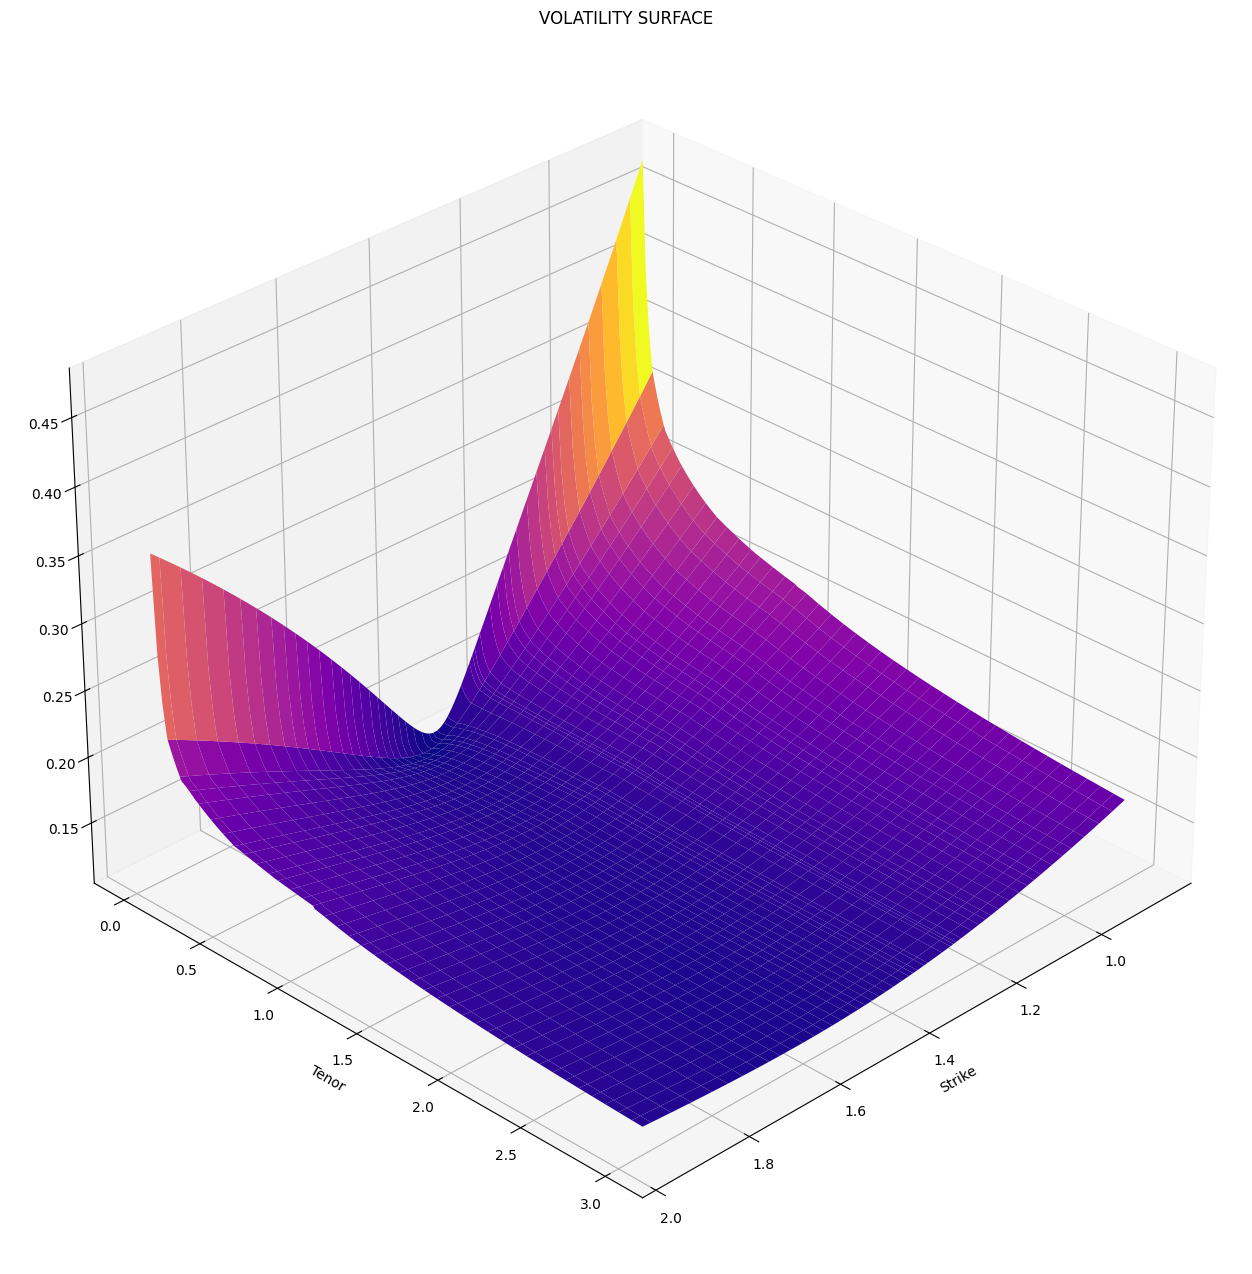

In [9]:
# plot 3D static surface 
sti.plot_surf_KT_interp(interp_iv)